In [32]:
import pandas as pd 
import numpy as np 
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv('amazon.csv')
data.sample(5)

,year,state,month,number,date
620,1999,Amapa,Agosto,0.0,1999-01-01
3364,2015,Paraiba,Janeiro,42.0,2015-01-01
666,2005,Amapa,Outubro,335.0,2005-01-01
4609,2005,Rio,Abril,2.0,2005-01-01
3532,2003,Paraiba,Outubro,381.0,2003-01-01


In [19]:
list_ = range(1, 13)
m = dict(zip(data['month'].unique(), list_))
data['month'] = data['month'].map(m)
def quarter(month):
    if month == 1 or month == 2 or month == 3:
        return '1_Quarter'
    elif month == 4 or month == 5 or month == 6:
        return '2_Quarter'
    elif month == 7 or month == 8 or month == 9:
        return '3_Quarter'
    elif month == 10 or month == 11 or month == 12:
        return '4_Quarter'

In [20]:
data['quarter'] = data['month'].apply(lambda x : quarter(x))

In [22]:
data.sample(5)

,year,state,month,number,date,quarter
520,1999,Amapa,3,2.0,1999-01-01,1_Quarter
2404,2011,Mato Grosso,1,171.0,2011-01-01,1_Quarter
5127,2005,Rondonia,6,153.0,2005-01-01,2_Quarter
2703,2011,Mato Grosso,4,23.0,2011-01-01,2_Quarter
257,2016,Alagoas,1,24.0,2016-01-01,1_Quarter


In [26]:
aux = data.groupby(['year', 'quarter'])['number'].agg('sum')
indexs = []
for year,quarter in list(aux.index):
    indexs.append(str(year)+'_'+str(quarter))

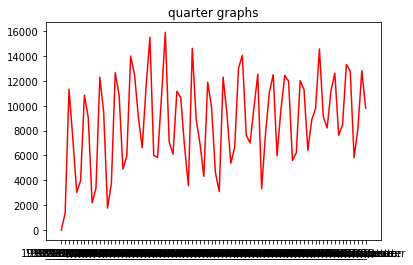

In [30]:
plt.plot(indexs,list(aux[:]),color="red")
plt.title('quarter graphs');

In [33]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(list(aux[:]))

Results of Dickey-Fuller Test:
Test Statistic                 -2.680682
p-value                         0.077441
#Lags Used                      5.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64
